In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the Data

df = pd.read_csv(r'/Users/ashish/Downloads/indian_liver_patient.csv')

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Dropping the columns

df.drop(columns=['Gender','Aspartate_Aminotransferase','Albumin_and_Globulin_Ratio'] ,inplace=True)
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Dataset
0,65,0.7,0.1,187,16,6.8,3.3,1
1,62,10.9,5.5,699,64,7.5,3.2,1
2,62,7.3,4.1,490,60,7.0,3.3,1
3,58,1.0,0.4,182,14,6.8,3.4,1
4,72,3.9,2.0,195,27,7.3,2.4,1


In [5]:
# Looking for missing values in the dataset

df.isna().sum()

Age                         0
Total_Bilirubin             0
Direct_Bilirubin            0
Alkaline_Phosphotase        0
Alamine_Aminotransferase    0
Total_Protiens              0
Albumin                     0
Dataset                     0
dtype: int64

In [6]:
df.shape

(583, 8)

In [7]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,6.483190,3.141852,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,1.085451,0.795519,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,2.700000,0.900000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,5.800000,2.600000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,6.600000,3.100000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,7.200000,3.800000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,9.600000,5.500000,2.000000


In [8]:
# Re-naming the columns

df.rename(columns={'Dataset':'Outcome'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 8 columns):
Age                         583 non-null int64
Total_Bilirubin             583 non-null float64
Direct_Bilirubin            583 non-null float64
Alkaline_Phosphotase        583 non-null int64
Alamine_Aminotransferase    583 non-null int64
Total_Protiens              583 non-null float64
Albumin                     583 non-null float64
Outcome                     583 non-null int64
dtypes: float64(4), int64(4)
memory usage: 36.6 KB


In [9]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Outcome
0,65,0.7,0.1,187,16,6.8,3.3,1
1,62,10.9,5.5,699,64,7.5,3.2,1
2,62,7.3,4.1,490,60,7.0,3.3,1
3,58,1.0,0.4,182,14,6.8,3.4,1
4,72,3.9,2.0,195,27,7.3,2.4,1


In [10]:
# Dropping the missing values
df = df.dropna()

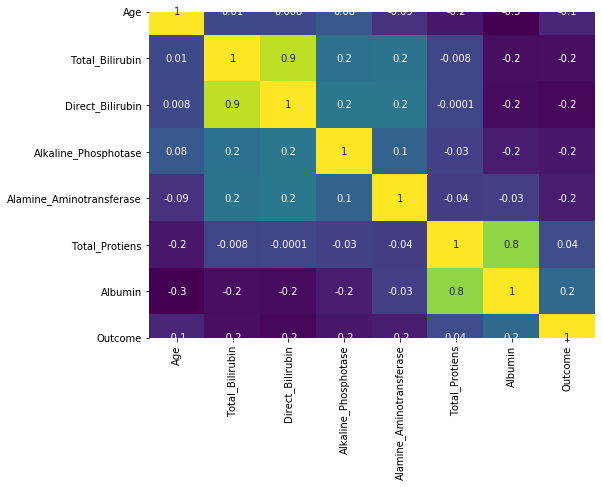

In [11]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False)
plt.show()

In [12]:
print ('Total Unhealthy Livers : {} '.format(df.Outcome.value_counts()[1]))
print ('Total Healthy Livers : {} '.format(df.Outcome.value_counts()[2]))

Total Unhealthy Livers : 416 
Total Healthy Livers : 167 


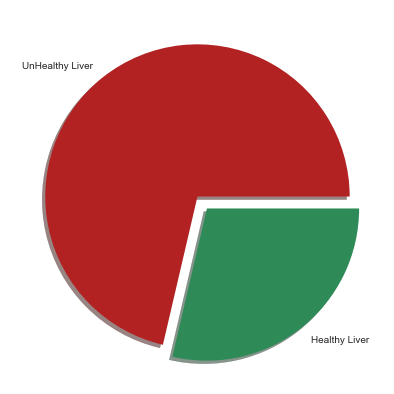

In [16]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))

plt.pie(x=df["Outcome"].value_counts(), 
        colors=["firebrick","seagreen"], 
        labels=["UnHealthy Liver","Healthy Liver"], 
        shadow = True, 
        explode = (0, 0.1)
        )

plt.show()

In [17]:
# X data
x = df.drop("Outcome", axis=1)
x.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin
0,65,0.7,0.1,187,16,6.8,3.3
1,62,10.9,5.5,699,64,7.5,3.2
2,62,7.3,4.1,490,60,7.0,3.3
3,58,1.0,0.4,182,14,6.8,3.4
4,72,3.9,2.0,195,27,7.3,2.4


In [18]:
# y data
y = df["Outcome"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [20]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
len(X_train), len(X_test)

(437, 146)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 69.17808219178082


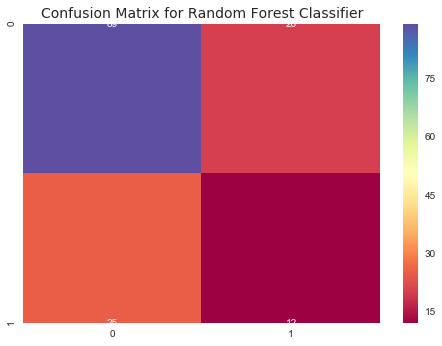

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="DejaVu Sans", y=1.03)
plt.show()

In [25]:
# Classification report of Random Forest Classifier

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.78      0.82      0.80       109
           2       0.38      0.32      0.35        37

    accuracy                           0.69       146
   macro avg       0.58      0.57      0.57       146
weighted avg       0.68      0.69      0.68       146



In [26]:
from sklearn.ensemble import AdaBoostClassifier

abt = AdaBoostClassifier()
abt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [27]:
AdaBoostClassifierScore = abt.score(X_test,y_test)
print("Accuracy obtained by Ada Boost Classifier model:",AdaBoostClassifierScore*100)

Accuracy obtained by Ada Boost Classifier model: 65.75342465753424


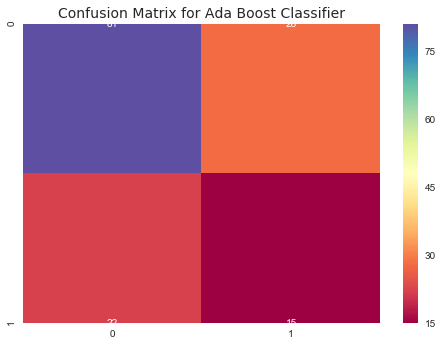

In [28]:
# Confusion matrix

y_pred_abt = abt.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_abt)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Ada Boost Classifier", fontsize=14, fontname="DejaVu Sans", y=1.03)
plt.show()

In [29]:
# Classification Report of Ada Boost Classifier

print(metrics.classification_report(y_test, y_pred_abt))

              precision    recall  f1-score   support

           1       0.79      0.74      0.76       109
           2       0.35      0.41      0.38        37

    accuracy                           0.66       146
   macro avg       0.57      0.57      0.57       146
weighted avg       0.68      0.66      0.67       146



In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 73.28767123287672


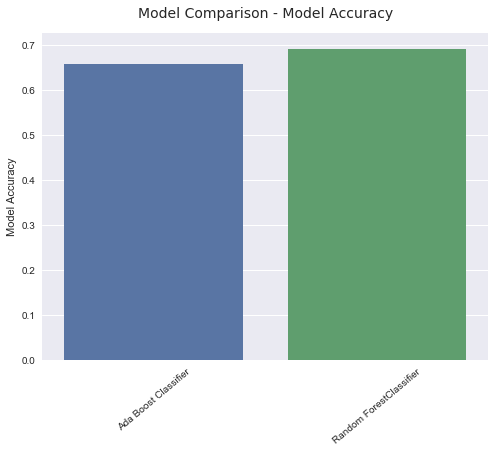

In [33]:
plt.style.use("seaborn")

x = ["Ada Boost Classifier", 
     "Random ForestClassifier"]

y = [AdaBoostClassifierScore, 
     RandomForestClassifierScore]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y);
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="DejaVu Sans", y=1.03)
plt.show()